Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

# Time Series Analysis


## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2.Download the **adjusted** close prices for META, MMM, IBM and AMZN for the last 60 months. 

3.Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. 
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

Use Yahoo Finance `yfinance` library

# Task 2
 Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months.

In [4]:
import yfinance as yf
import datetime
import pandas as pd

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=60*365/12)  # 60 months ago

tickers = ['META', 'MMM', 'IBM', 'AMZN']

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

print(data)


[*********************100%%**********************]  4 of 4 completed
                  AMZN         IBM        META         MMM
Date                                                      
2018-11-19   75.614502   90.122650  131.550003  169.605087
2018-11-20   74.773003   87.792992  132.429993  165.422318
2018-11-21   75.836502   88.819252  134.820007  165.040222
2018-11-23   75.102997   87.785500  131.729996  163.470276
2018-11-26   79.066498   89.560852  136.380005  166.012085
...                ...         ...         ...         ...
2023-11-09  140.600006  146.619995  320.549988   91.699997
2023-11-10  143.559998  149.020004  328.769989   92.809998
2023-11-13  142.589996  148.100006  329.190002   92.690002
2023-11-14  145.800003  150.410004  336.309998   94.970001
2023-11-15  143.199997  152.580002  332.709991   96.820000

[1256 rows x 4 columns]


# 3. Task 
 Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock.

In [5]:
data.index = pd.to_datetime(data.index)

# Resample the data to get the end of the business month
resampled_data = data.groupby(data.index.to_period('M')).tail(1)

# Select the Adjusted Close for each stock.
print(resampled_data)

                  AMZN         IBM        META         MMM
Date                                                      
2018-11-30   84.508499   93.089027  140.610001  172.707047
2018-12-31   75.098503   85.148720  131.089996  158.270462
2019-01-31   85.936501  100.692284  166.690002  166.377533
2019-02-28   81.991501  104.676956  161.449997  173.457809
2019-03-29   89.037498  106.927650  166.690002  173.784012
...                ...         ...         ...         ...
2023-07-31  133.679993  140.941238  318.600006  109.857079
2023-08-31  138.009995  145.183456  295.890015  106.669998
2023-09-29  127.120003  138.726685  300.209991   93.620003
2023-10-31  133.089996  143.018005  301.269989   90.949997
2023-11-15  143.199997  152.580002  332.709991   96.820000

[61 rows x 4 columns]


# 4. Task
 Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.

Are they autocorrelated?
Provide short explanation.

# No, they are not. 
The autocorrelation plot shows that the autocorrelation values remain¶
above the significance lines (usually displayed as dashed lines) for several lags, 
it indicates that the series is autocorrelated. This would mean that past values 
of the series have a significant influence on future values. Because the autocorrelation 
values quickly drop below the significance lines, it suggests that the series does not have significant autocorrelation.

In [14]:
import matplotlib.pyplot as plt 

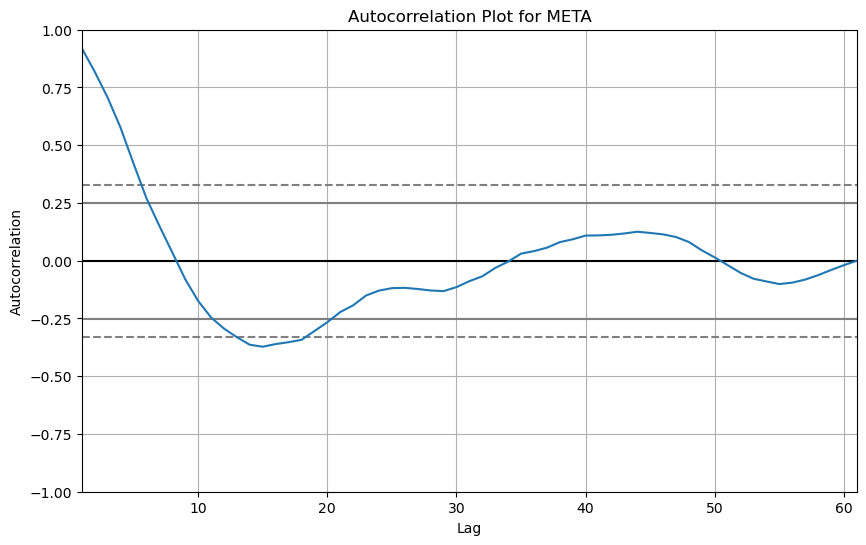

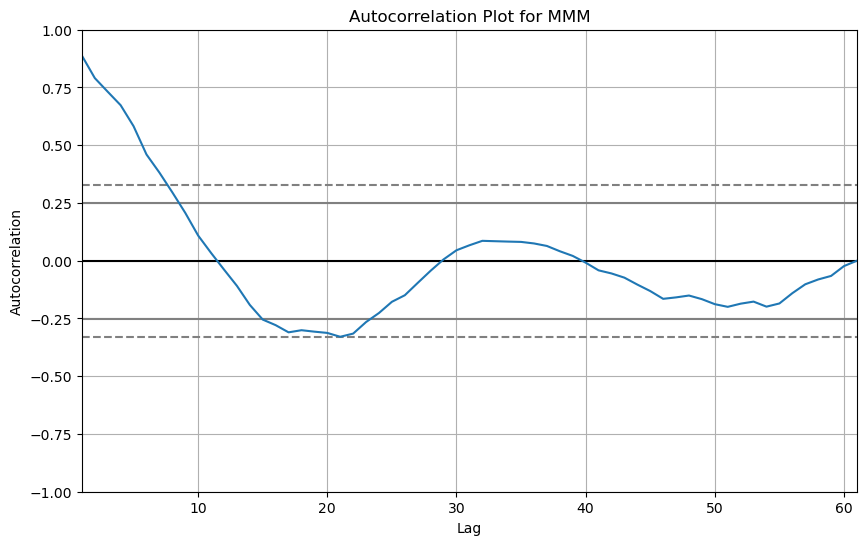

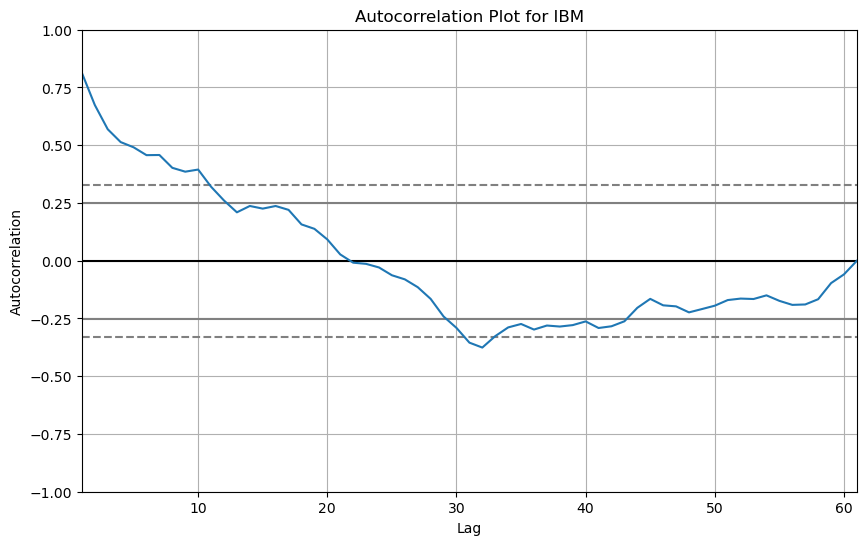

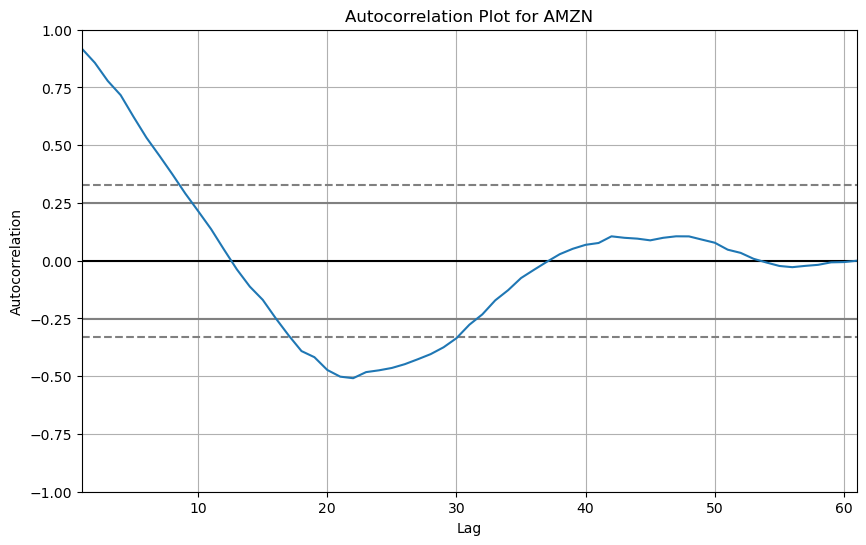

In [15]:
for ticker in tickers:
    plt.figure(figsize=(10, 6))
    pd.plotting.autocorrelation_plot(monthly_data[ticker])
    plt.title(f'Autocorrelation Plot for {ticker}')
    plt.show()

# 5. Task
 Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, 
using shift() function. Use pandas autotocorrelationUse pandas autotocorrelation_plot() to plot the autocorrelation 
of the monthly returns. 
Are the returns autocorrelated? Provide short explanation.

# No, they are not. 
Because the plot for a stock's returns remains mostly within the confidence interval, 
it suggests low or no significant autocorrelation.

In [16]:
import pandas as pd

In [18]:
monthly_returns = monthly_data / monthly_data.shift(1) - 1
monthly_returns = monthly_returns.dropna()
print(monthly_returns)

                AMZN       IBM      META       MMM
Date                                              
2018-11-30  0.057672  0.090295 -0.073654  0.100283
2018-12-31 -0.111350 -0.085298 -0.067705 -0.083590
2019-01-31  0.144317  0.182546  0.271569  0.051223
2019-02-28 -0.045906  0.039573 -0.031436  0.042555
2019-03-29  0.085936  0.021501  0.032456  0.001880
2019-04-30  0.081859 -0.005882  0.160238 -0.087929
2019-05-31 -0.078613 -0.083921 -0.082368 -0.149824
2019-06-28  0.066792  0.085913  0.087508  0.085070
2019-07-31 -0.014179  0.074982  0.006373  0.007961
2019-08-30 -0.048474 -0.074967 -0.044071 -0.065936
2019-09-30 -0.022733  0.072973 -0.040879  0.016572
2019-10-31  0.023475 -0.080388  0.076202  0.003589
2019-11-29  0.013587  0.017259  0.052126  0.037879
2019-12-31  0.026122 -0.003050  0.017903  0.039171
2020-01-31  0.087064  0.072292 -0.016273 -0.100669
2020-02-28 -0.062214 -0.085027 -0.046754 -0.050854
2020-03-31  0.035021 -0.147676 -0.133371 -0.085299
2020-04-30  0.268900  0.131885 

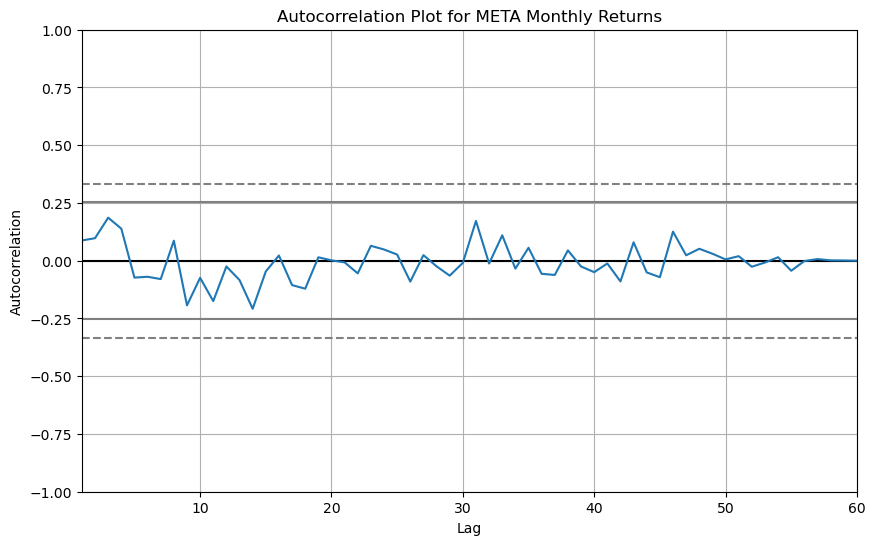

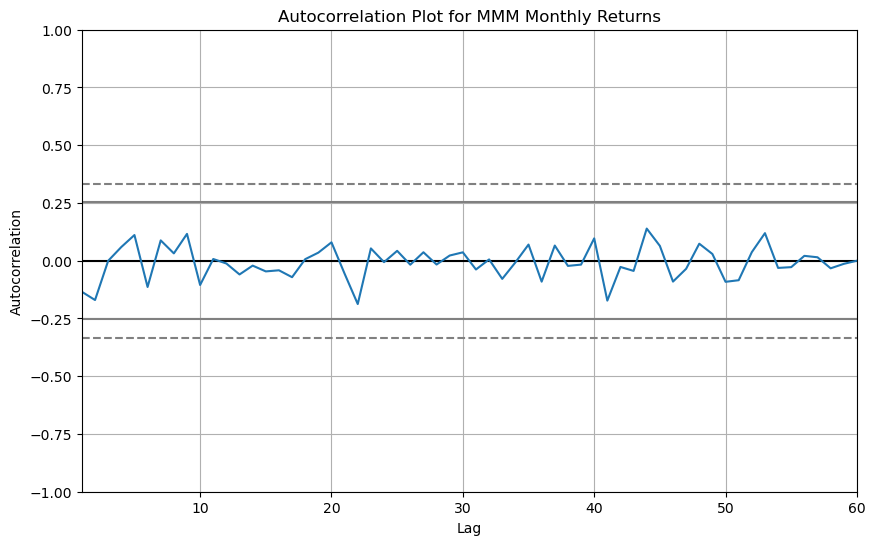

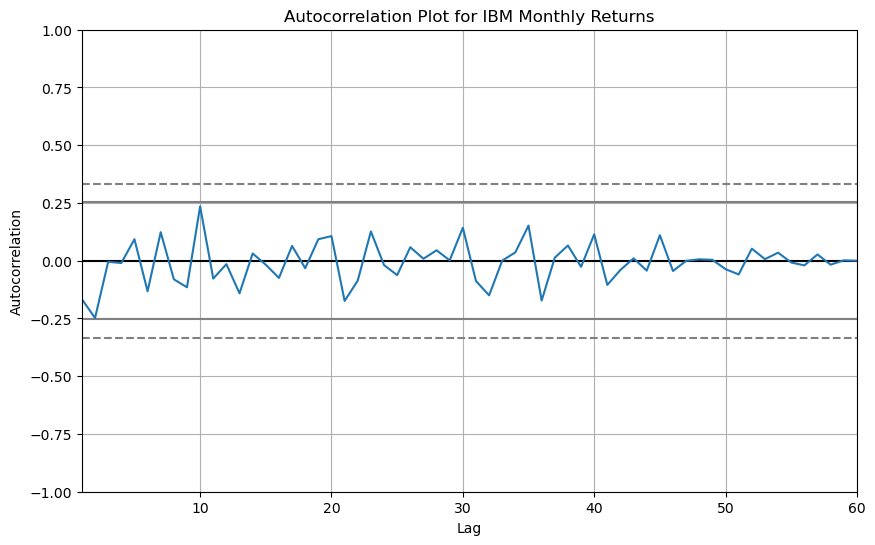

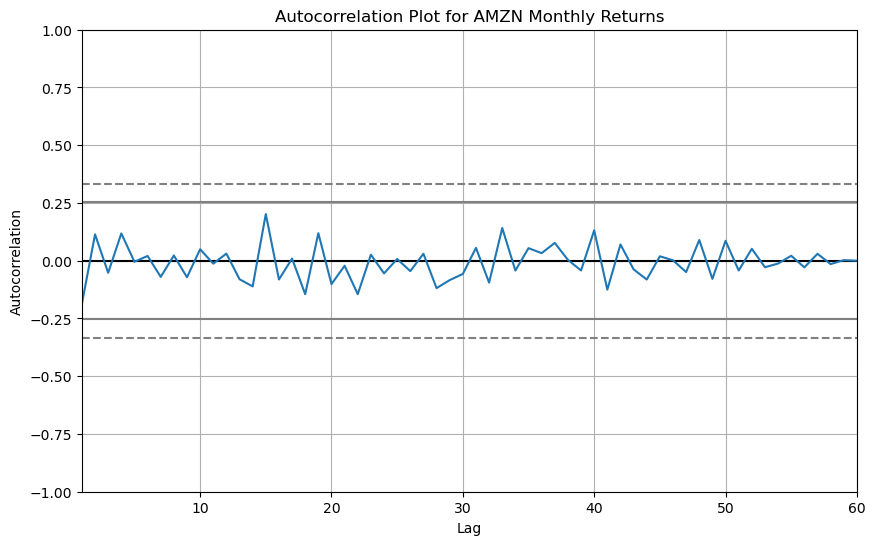

In [19]:
for ticker in tickers:
    plt.figure(figsize=(10, 6))
    pd.plotting.autocorrelation_plot(monthly_returns[ticker])
    plt.title(f'Autocorrelation Plot for {ticker} Monthly Returns')
    plt.show()

# 6. Task
Combine all 4 time series (returns) into a single DataFrame, Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use scatter_matrix() function from pandas.plotting). 
Explain the results. Is there any correlation?

# Since I see a pattern or trend in a scatter plot (a linear arrangement of points), 
it suggests a correlation between those two stocks. A positive slope indicates a positive correlation 
(as one stock's returns go up, so do the other's).

Yes, there is likely some correlation between the returns of the stocks, 
but the extent and significance of this correlation can vary.

In [22]:
from pandas.plotting import scatter_matrix
import seaborn as sns

<Figure size 1000x1000 with 0 Axes>

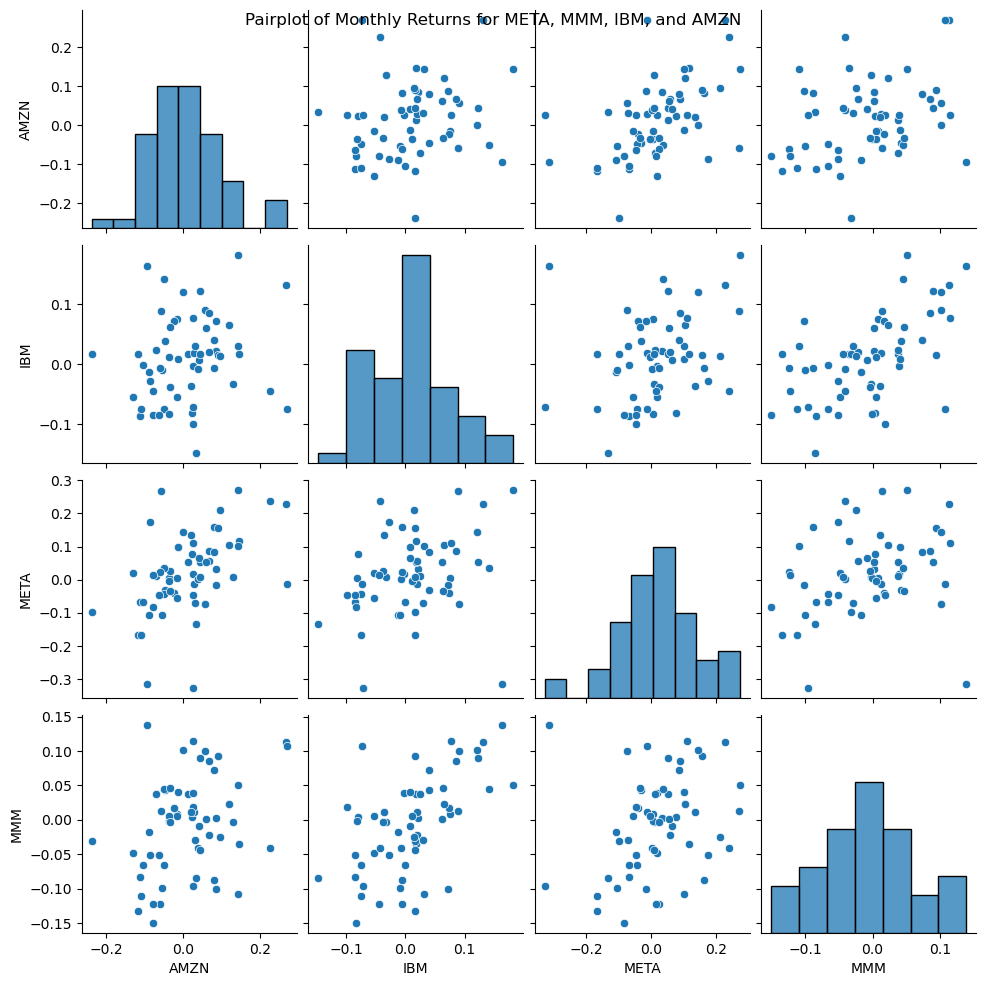

In [24]:
plt.figure(figsize=(10, 10))
sns.pairplot(monthly_returns)
plt.suptitle("Pairplot of Monthly Returns for META, MMM, IBM, and AMZN")
plt.savefig("stock_data_pairplot.png")
plt.show()

<Figure size 1000x1000 with 0 Axes>

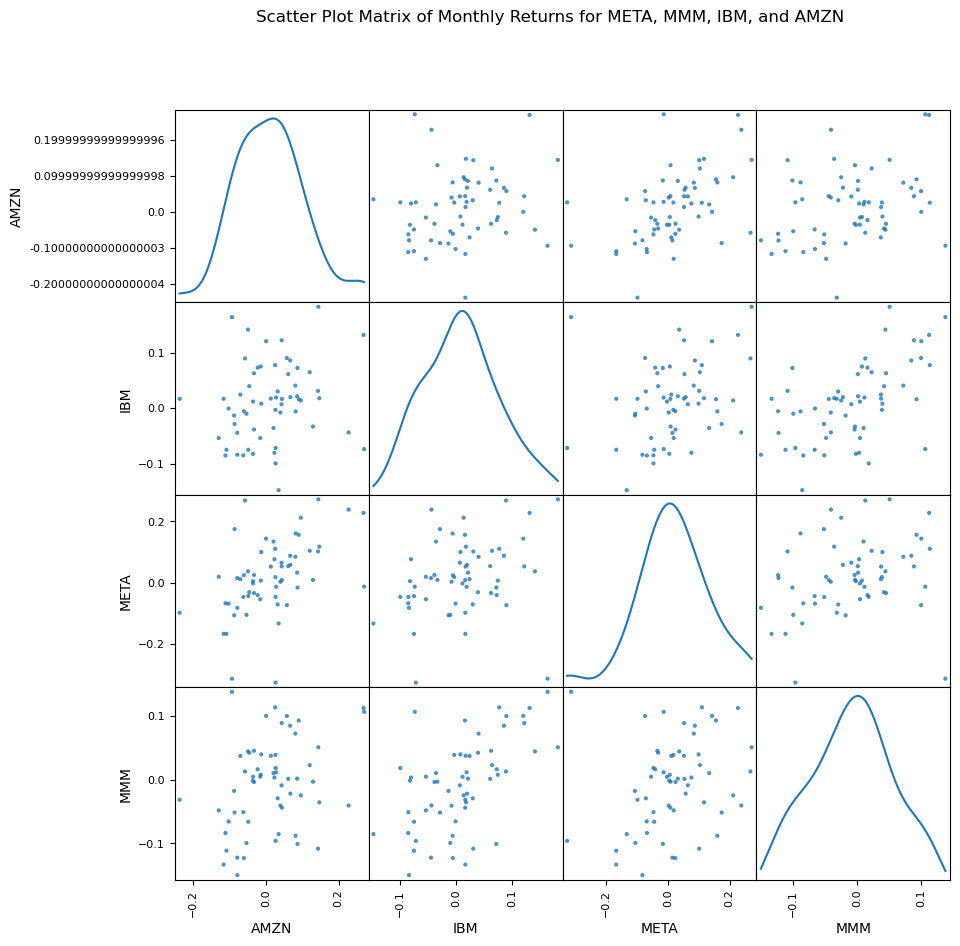

In [21]:
plt.figure(figsize=(10, 10))
scatter_matrix(monthly_returns, alpha=0.8, figsize=(10, 10), diagonal='kde')
plt.suptitle("Scatter Plot Matrix of Monthly Returns for META, MMM, IBM, and AMZN")
plt.show()